<a href="https://colab.research.google.com/github/desireesosa/Investigacion-de-Operaciones-/blob/main/M%C3%A9todoJacobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de Jacobi** \
*Es un proceso de aproximacion sucesiva para resolver sistemas de ecuaciones lineales compatibles. Se requiere de la verificación de un criterio de convergencia.*

*Este metodo se define como un sistema de ecuaciones lineales $Ax̄=b̄$ donde A es la matriz de coeficientes, x̄ es el vector de incógniyas y b̄ el de terminos independientes.*


Programando el metodo de Jacobi.

In [33]:
#Metodo de Jacobi
import numpy as np

def metodo_jacobi(x,y):
  return -2 * (np.pi**2) * np.sin(np.pi*x) * np.sin(np.pi*y)

donde los parametros

In [34]:
n=20
x=np.linspace(0,1,n+2)
y=np.linspace(0,1,n+2)
nmax=5000
tol=1e-6
h=1/(n+1)
X,Y=np.meshgrid(x,y)
fxy=metodo_jacobi(X,Y)

In [35]:
for k in range(1, nmax + 1):
    u_prev = u.copy()
    u_new = u_prev.copy()

    for i in range(1, n + 1):
        for j in range(1, n + 1):
            u_new[i, j] = 0.25 * (h**2 * fxy[i, j] +
                                  u_prev[i + 1, j] + u_prev[i - 1, j] +
                                  u_prev[i, j + 1] + u_prev[i, j - 1])

    if np.linalg.norm(u_new - u_prev, ord=np.inf) < tol:
        print(f"Convergió en {k} iteraciones.")
        break

    u = u_new.copy()

else:
    print(f"No convergió después de {nmax} iteraciones.")

Convergió en 1062 iteraciones.


solucion exacta:

In [36]:
u_exact = np.sin(np.pi * X) * np.sin(np.pi * Y)

calculando el error:

In [37]:
error = np.max(np.abs(u - u_exact))
print(f"Error maximo: {error:.6e}")

Error maximo: 1.990681e+00


graficando:

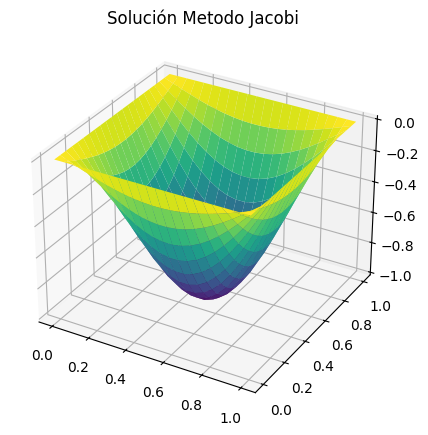

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, u, cmap='viridis')
ax1.set_title("Solución Metodo Jacobi")

plt.show()